In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv("train.csv", index_col='Id')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [115]:
# Only keep numeric features
data_numeric = data.select_dtypes(exclude="object")
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [116]:
y = data_numeric["SalePrice"]
data_numeric = data_numeric.drop("SalePrice", axis=1)
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [99]:
#NaN: LotFrontage	MasVnrArea	GarageYrBlt
data_numeric.isnull().any()
data_numeric.shape

(1460, 36)

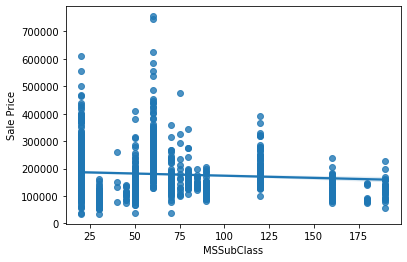

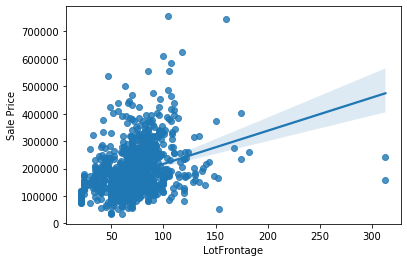

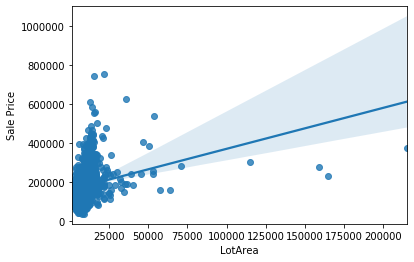

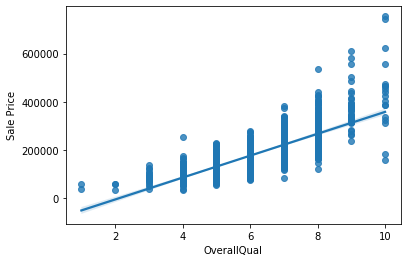

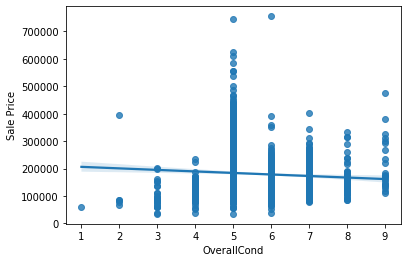

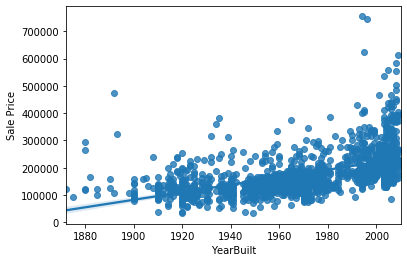

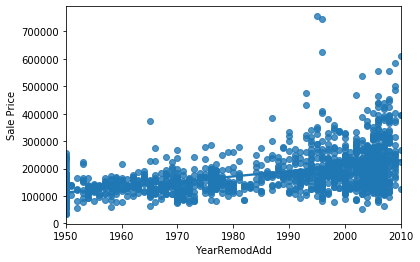

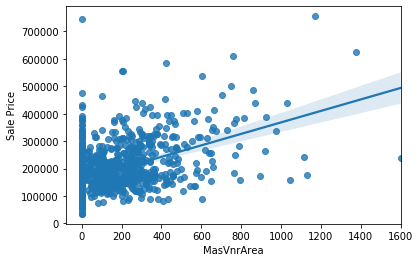

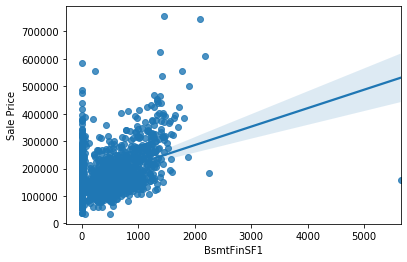

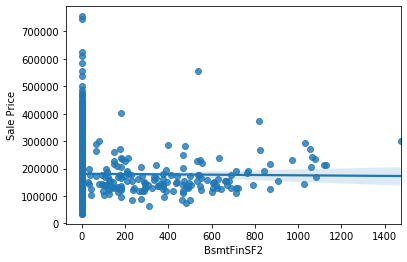

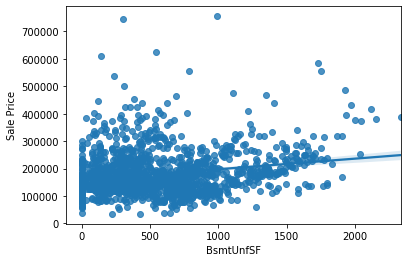

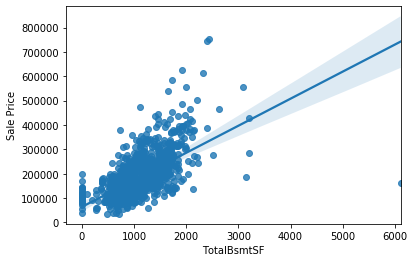

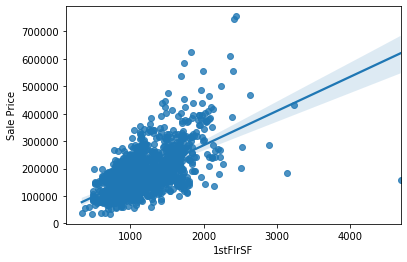

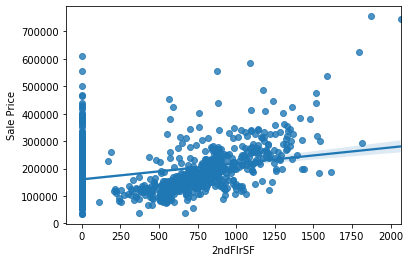

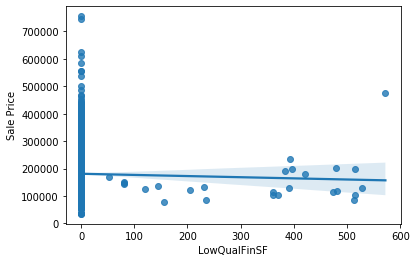

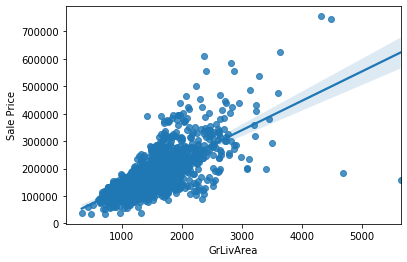

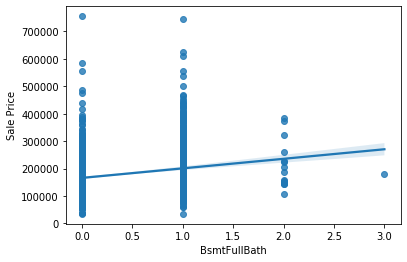

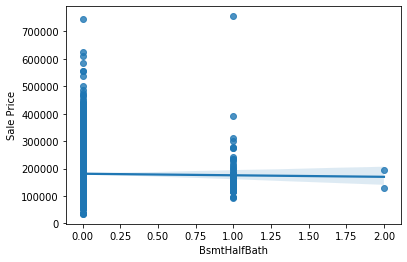

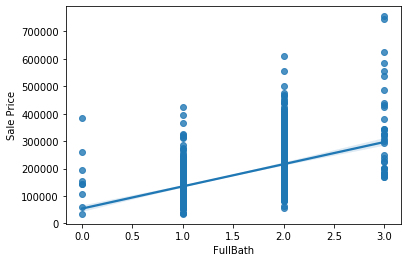

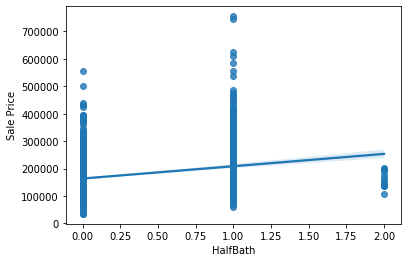

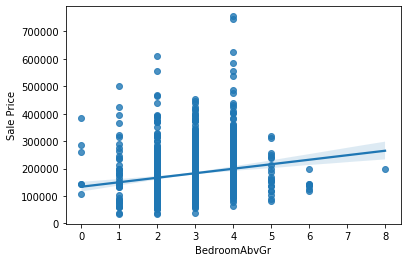

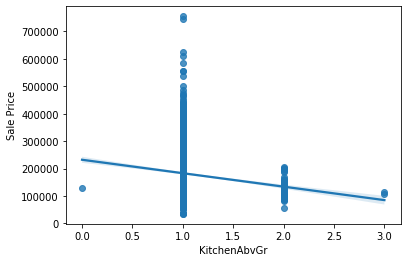

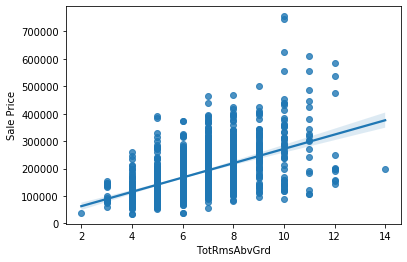

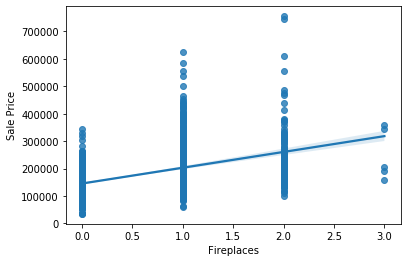

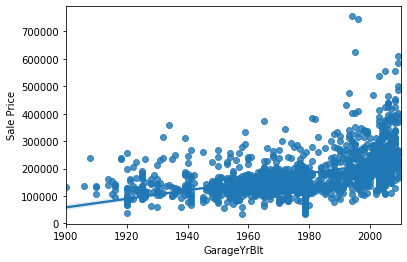

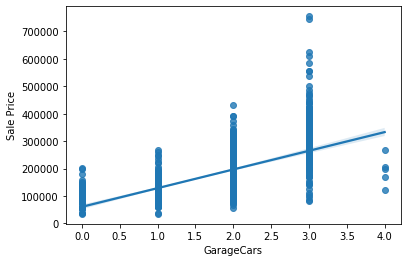

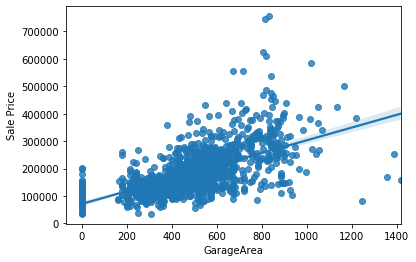

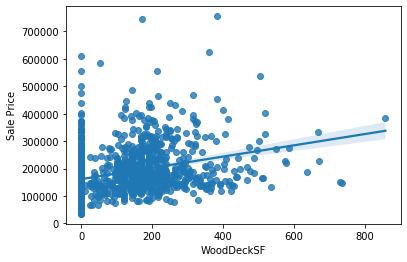

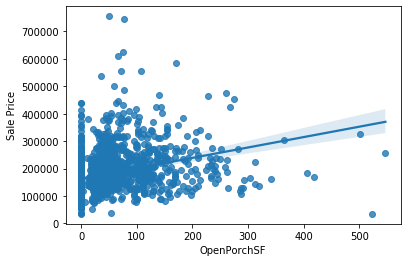

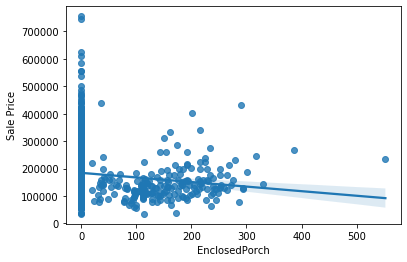

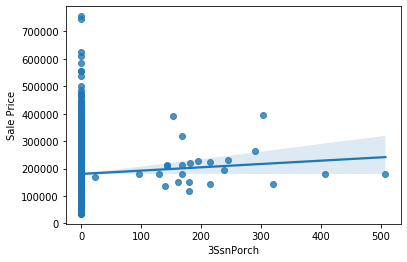

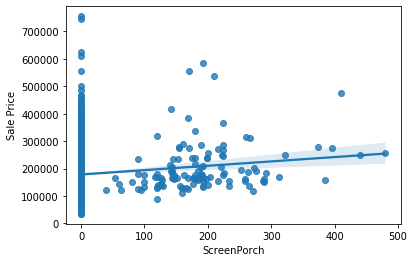

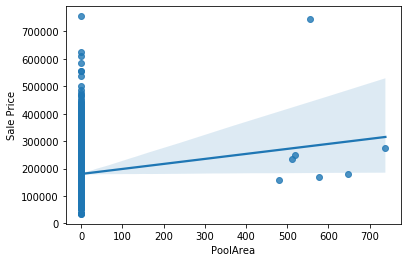

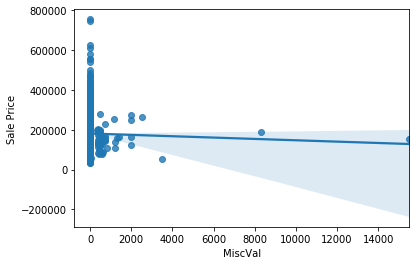

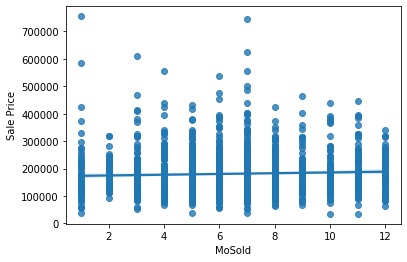

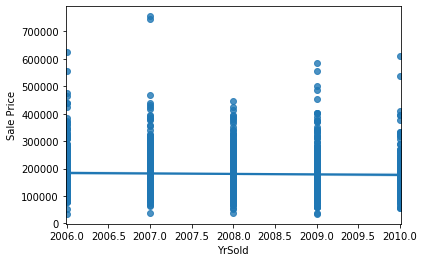

In [110]:
for x in data_numeric.columns:
    sns.regplot(data_numeric[x], y)
    plt.xlabel(x)
    plt.ylabel("Sale Price")
    plt.show()

In [138]:
strong_columns = ["LotFrontage", "LotArea", "OverallQual", 
                  "MasVnrArea", "BsmtFinSF1", "TotalBsmtSF", 
                  "1stFlrSF", "GrLivArea", "FullBath", "KitchenAbvGr", 
                  "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea"]

weak_columns = ["YearBuilt", "YearRemodAdd", "WoodDeckSF", 
                "OpenPorchSF", "BsmtUnfSF","BsmtFullBath",
               "BedroomAbvGr","GarageYrBlt"]
selected_columns = strong_columns+weak_columns

data_strong = data_numeric[strong_columns]
data_weak = data_numeric[weak_columns]
data_selected = data_numeric[selected_columns]

#imputed
imputer_strong = SimpleImputer()
imputed_data_strong = pd.DataFrame(imputer_strong.fit_transform(data_strong))
imputed_data_strong.columns = strong_columns

imputer_weak = SimpleImputer()
imputed_data_weak = pd.DataFrame(imputer_weak.fit_transform(data_weak))
imputed_data_weak.columns = weak_columns

imputer_selected = SimpleImputer()
imputed_data_selected = pd.DataFrame(imputer_selected.fit_transform(data_selected))
imputed_data_selected.columns = selected_columns

#Linear Regression Model for Strong relation selected columns
(train_X, val_X, train_y, val_y) = train_test_split(imputed_data_strong, y, test_size=0.2)
reg_strong = LinearRegression()
reg_strong.fit(train_X, train_y)
preds = reg_strong.predict(val_X)
print("Regression score on strong related features: {}".format(reg_strong.score(val_X, val_y)))

#Linear Regression Model for Weak relation selected columns
(train_X, val_X, train_y, val_y) = train_test_split(imputed_data_weak, y, test_size=0.2)
reg_weak = LinearRegression()
reg_weak.fit(train_X, train_y)
preds = reg_weak.predict(val_X)
print("Regression score on weak related features: {}".format(reg_weak.score(val_X, val_y)))

#Linear Regression Model for All Selected relation selected columns
(train_X, val_X, train_y, val_y) = train_test_split(imputed_data_selected, y, test_size=0.2)
reg_selected = LinearRegression()
reg_selected.fit(train_X, train_y)
preds = reg_selected.predict(val_X)
print("Regression score on selected related features: {}".format(reg_selected.score(val_X, val_y)))



Regression score on strong related features: 0.8194179507037506
Regression score on weak related features: 0.4915494102690594
Regression score on selected related features: 0.7840653902714583


In [143]:
for i in range(5):
    final_model = LinearRegression()
    final_model.fit(imputed_data_strong, y)

    test = pd.read_csv("test.csv")
    data_test = test[strong_columns]
    data_test = pd.DataFrame(imputer_strong.transform(data_test))
    data_test.columns = strong_columns

    preds = final_model.predict(data_test)
    result = pd.DataFrame({"Id":test.Id, "SalePrice":preds})
    result.to_csv("linear_reg_submission_{}.csv".format(i))